In [1]:
from Funcoes import *
from tensorflow.keras.models import load_model

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['lines.linewidth'] = 2

In [4]:
model_2_sps = load_model('model_sps_2.h5')
model_4_sps = load_model('model_sps_4.h5')

In [6]:
M = 16        # ordem da modulação
Fb = 24e9      # taxa de símbolos
SpS = 4         # amostras por símbolo
Fs = SpS*Fb    # taxa de amostragem
rolloff = 0.05  # Rolloff do filtro formatador de pulso
amostras = 512
size = 50000

In [ ]:
qam_signal = generate_signal(M,Fb,SpS,30,rolloff=0.05)
sfm, A = qam_signal_phase_min(qam_signal)
data,X,y = dataset_02(sfm,amostras,size)
_,_, X_test,_ = train_test_datasets(X,y,size)
predicted_signal = predict_signal(model_4_sps,data,X_test,size)
reverted_signal = revert_sfm(predicted_signal,A)

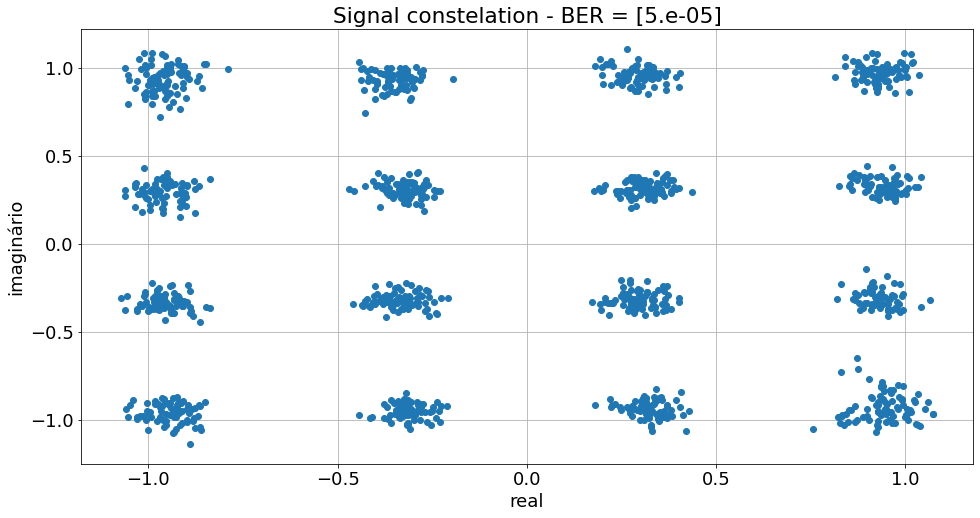

In [10]:
plot_constelation(reverted_signal,SpS)

In [12]:
reverted_signal[0,::SpS].cal_ber()

array([5.e-05])

In [25]:
SNRs = np.arange(16,40.1,0.5)
BERs = np.zeros(SNRs.size)
SpS = 4
if SpS == 4:
    model = model_4_sps
if SpS == 2:
    model = model_2_sps
for i , SNR in enumerate(SNRs):
    qam_signal = generate_signal(M,Fb,SpS,SNR,rolloff=0.05)
    sfm, A = qam_signal_phase_min(qam_signal)
    data,X,y = dataset_02(sfm,amostras,size)
    _,_, X_test,_ = train_test_datasets(X,y,size)
    predicted_signal = predict_signal(model,data,X_test,size)
    reverted_signal = revert_sfm(predicted_signal,A)
    BERs[i] = reverted_signal[0,::SpS].cal_ber()

In [23]:
SNRs = np.arange(16,40.1,0.5)
BERs = np.zeros(SNRs.size)
BERs

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

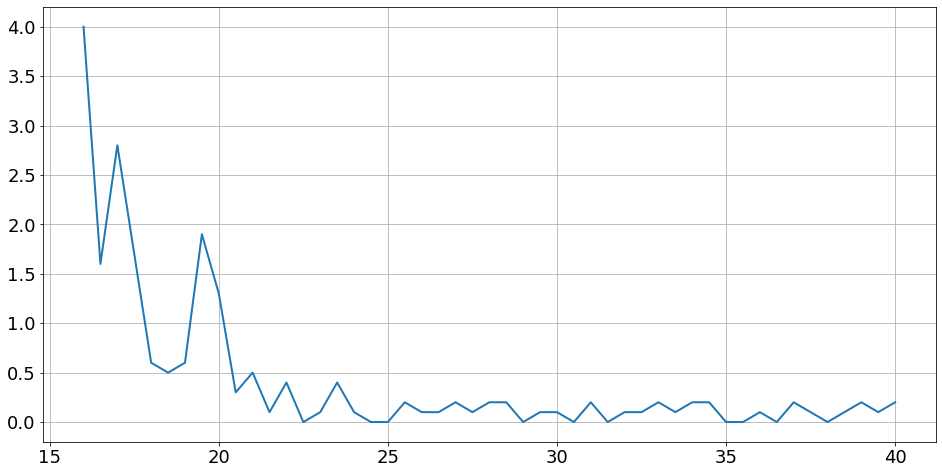

In [27]:
plt.plot(SNRs,BERs*1e3)
plt.grid(True)

In [13]:
BERs

[array([0.0051]),
 array([0.0016]),
 array([0.0002]),
 array([0.]),
 array([0.0002]),
 array([0.]),
 array([0.]),
 array([0.0001]),
 array([0.0001]),
 array([0.0002]),
 array([0.0002]),
 array([0.0001]),
 array([0.0002])]